In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# orders = pd.read_csv('ORDERS.csv')
# order_items = pd.read_csv('ORDER_ITEMS.csv')
# customers= pd.read_csv('CUSTOMERS.csv')
# order_review = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
# order_payments = pd.read_csv('ORDER_PAYMENTS.csv')
# products =pd.read_csv('PRODUCTS.csv')
# sellers = pd.read_csv('SELLERS.csv')
# location = pd.read_csv('GEO_LOCATION.csv')

All the above files were merged and saved as "data.csv"

In [12]:
data =pd.read_csv("data.csv")

In [ ]:
data.columns

In [ ]:
tl_revenue = data['payment_value'].sum()
print("total revenue is ",tl_revenue)
tl_qty = len(data)
print('total order qty is :',tl_qty)
tl_products =data['product_id'].nunique()
print("total no of diff products are: ",tl_products),
tl_cat = data['product_category_name'].nunique()
print("total unique categories are: ",tl_cat)
tl_sell = data['seller_id'].nunique()
print("total unique sellers are: ",tl_sell)
tl_pmethod = data['payment_type'].nunique()
print("total number of payment methods are:", tl_pmethod)
tl_locations = data['customer_zip_code_prefix'].nunique()
print("total number of locations are:", tl_locations)

In [52]:
data['year']=pd.to_datetime(data['order_purchase_timestamp']).dt.year
data['month']=pd.to_datetime(data['order_purchase_timestamp']).dt.month

In [12]:
data.groupby(['year','month'])['customer_id'].count()

year  month
2016  9           3
      10        386
      12          1
2017  1        1023
      2        2072
      3        3193
      4        2858
      5        4433
      6        3804
      7        4877
      8        5205
      9        5125
      10       5603
      11       9069
      12       6576
2018  1        8588
      2        7998
      3        8569
      4        8251
      5        8208
      6        7376
      7        7337
      8        7442
      9           1
Name: customer_id, dtype: int64

In [4]:
monthly = pd.pivot_table(data,index=['year','month'],values=['customer_id','price'],aggfunc={'customer_id':'count','price':'sum'})

In [5]:
monthly['customer_change']=monthly['customer_id'].diff().shift(0)

In [6]:
monthly['retention_rate']=round(((monthly['customer_change'])*100/(monthly['customer_id'].shift(1))),2)

In [7]:
monthly['revenue_change']=monthly['price'].diff().shift(0)

In [10]:
monthly.rename(columns={'customer_id':'No of current users','price':'total revenue'},inplace=True)

In [11]:
monthly.T

year                   2016                           2017              
month                    9         10        12         1          2    
No of current users    3.00    386.00      1.00    1023.00    2072.00  \
total revenue        132.39  51468.91     10.90  129895.32  261963.96   
customer_change         NaN    383.00   -385.00    1022.00    1049.00   
retention_rate          NaN  12766.67    -99.74  102200.00     102.54   
revenue_change          NaN  51336.52 -51458.01  129884.42  132068.64   

year                                                                         
month                       3          4          5          6          7    
No of current users    3193.00    2858.00    4433.00    3804.00    4877.00  \
total revenue        397310.65  392112.14  547657.85  454453.83  534568.42   
customer_change        1121.00    -335.00    1575.00    -629.00    1073.00   
retention_rate           54.10     -10.49      55.11     -14.19      28.21   
revenue_change       135346.69   -5198.51  155545.71  -93204.02   80114.59   

year                 ...                  2018                          
month                ...         12         1          2           3    
No of current users  ...    6576.00    8588.00    7998.00     8569.00  \
total revenue        ...  771809.13  992358.21  886596.65  1027006.94   
customer_change      ...   -2493.00    2012.00    -590.00      571.00   
retention_rate       ...     -27.49      30.60      -6.87        7.14   
revenue_change       ... -278894.70  220549.08 -105761.56   140410.29   

year                                                                           
month                        4           5          6          7          8    
No of current users     8251.00     8208.00    7376.00    7337.00    7442.00  \
total revenue        1029429.56  1030876.97  907843.11  925385.36  882345.48   
customer_change         -318.00      -43.00    -832.00     -39.00     105.00   
retention_rate            -3.71       -0.52     -10.14      -0.53       1.43   
revenue_change          2422.62     1447.41 -123033.86   17542.25  -43039.88   

year                            
month                       9   
No of current users       1.00  
total revenue           145.00  
customer_change       -7441.00  
retention_rate          -99.99  
revenue_change      -882200.48  

[5 rows x 24 columns]

In [24]:
#quantity by category:
print("total quantity by category: ",data.groupby('product_category_name')['order_id'].count())

#sales by category:
print("total sales by category: ",data.groupby('product_category_name')['payment_value'].sum())

total quantity by category:  product_category_name
Agro_Industry_And_Commerce     252
Air_Conditioning               302
Art                            219
Arts_And_Craftmanship           24
Audio                          380
                              ... 
Stationery                    2618
Tablets_Printing_Image          87
Telephony                     4710
Toys                          4269
Watches_Gifts                 6188
Name: order_id, Length: 71, dtype: int64
total sales by category:  product_category_name
Agro_Industry_And_Commerce     118730.61
Air_Conditioning                91170.66
Art                             30992.93
Arts_And_Craftmanship            2326.17
Audio                           60358.49
                                 ...    
Stationery                     317075.28
Tablets_Printing_Image          10042.93
Telephony                      485991.91
Toys                           618881.42
Watches_Gifts                 1423841.71
Name: payment_value, Len

In [25]:
#quantity by user-location:
print("total quantity by customer city: ",data.groupby('customer_city')['order_id'].count())

#sales by user-location:
print("total sales by customer city: ",data.groupby('customer_city')['payment_value'].sum())

total quantity by customer city:  customer_city
Aadityana          32
Aambaliyasan        2
Aantaliya         108
Aarambhada         52
Abiramam            1
                 ... 
Zamin Uthukuli      2
Ziauddin Pur      161
Zira                5
Zirakpur            4
Ziro               56
Name: order_id, Length: 4066, dtype: int64
total sales by customer city:  customer_city
Aadityana          2134.53
Aambaliyasan        242.94
Aantaliya         16903.07
Aarambhada         7186.11
Abiramam             89.19
                    ...   
Zamin Uthukuli      221.71
Ziauddin Pur      25585.55
Zira                568.43
Zirakpur            600.64
Ziro               7094.85
Name: payment_value, Length: 4066, dtype: float64


In [26]:
#quantity by paymentmethod:
print("total quantity by paymentmethod: ",data.groupby('payment_type')['order_id'].count())

#sales by paymentmethod:
print("total sales by paymentmethod: ",data.groupby('payment_type')['payment_value'].sum())

total quantity by paymentmethod:  payment_type
UPI            22957
credit_card    87026
debit_card      1698
voucher         6317
Name: order_id, dtype: int64
total sales by paymentmethod:  payment_type
UPI             4068362.00
credit_card    15629400.45
debit_card       254447.23
voucher          408143.95
Name: payment_value, dtype: float64


In [27]:
#quantity by month:
print("total quantity by month: ",data.groupby('month')['order_id'].count())

#sales by paymentmethod:
print("total sales by month: ",data.groupby('month')['payment_value'].sum())

total quantity by month:  month
1      9611
2     10070
3     11762
4     11109
5     12641
6     11180
7     12214
8     12647
9      5129
10     5989
11     9069
12     6577
Name: order_id, dtype: int64
total sales by month:  month
1     1606210.70
2     1665291.39
3     2008146.31
4     2002742.33
5     2231948.06
6     1896564.36
7     2090964.93
8     2099808.90
9     1020140.34
10    1108357.22
11    1585975.50
12    1044203.59
Name: payment_value, dtype: float64


<Axes: xlabel='month', ylabel='No of current users'>

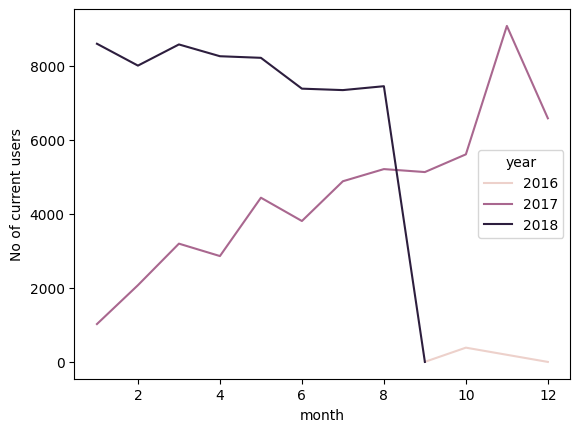

In [70]:
sns.lineplot(data = monthly,x='month', y='No of current users' , hue = 'year')

<Axes: xlabel='month', ylabel='total revenue'>

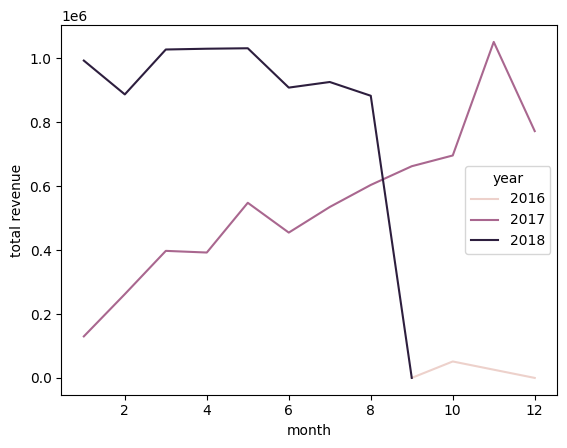

In [71]:
sns.lineplot(data = monthly,x='month', y='total revenue' , hue = 'year')

In [5]:
data['weekly']=pd.to_datetime(data['order_purchase_timestamp']).dt.weekday
data['hour']=pd.to_datetime(data['order_purchase_timestamp']).dt.hour

In [11]:
weekly = data.groupby('weekly')[['customer_id','payment_value']].agg({'customer_id':'count','payment_value':'mean'})

<Axes: xlabel='weekly', ylabel='payment_value'>

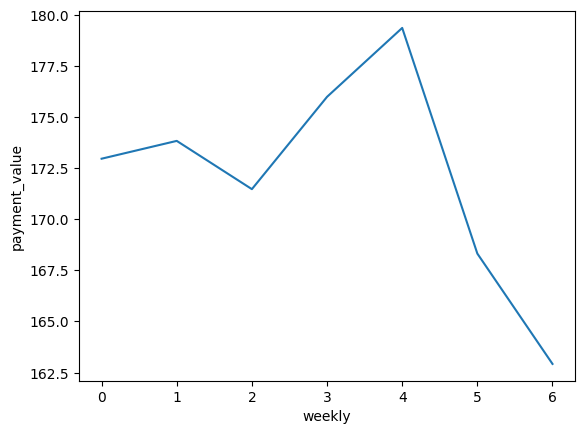

In [15]:
sns.lineplot(data = weekly,x='weekly', y='payment_value')

In [16]:
hourly = data.groupby('hour')[['customer_id','payment_value']].agg({'customer_id':'count','payment_value':'mean'})

<Axes: xlabel='hour', ylabel='payment_value'>

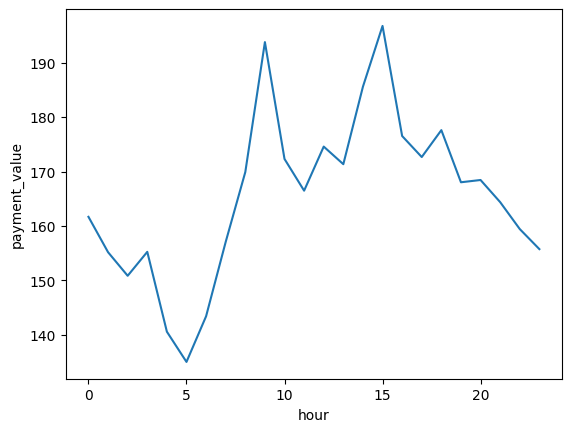

In [18]:
sns.lineplot(data = hourly,x='hour', y='payment_value')

In [59]:
freq=data.groupby('month')['product_id'].value_counts()
top1 = freq.groupby('month').head(1)
print('popular products by month')
top1

popular products by month


month  product_id                      
1      aca2eb7d00ea1a7b8ebd4e68314663af    124
2      e53e557d5a159f5aa2c5e995dfdf244b     72
3      aca2eb7d00ea1a7b8ebd4e68314663af     64
4      aca2eb7d00ea1a7b8ebd4e68314663af     88
5      53b36df67ebb7c41585e8d54d6772e08    114
6      99a4788cb24856965c36a24e339b6058     76
7      99a4788cb24856965c36a24e339b6058     71
8      e7cc48a9daff5436f63d3aad9426f28b     74
9      422879e10f46682990de24d770e7f83d     38
10     422879e10f46682990de24d770e7f83d     42
11     422879e10f46682990de24d770e7f83d     97
12     422879e10f46682990de24d770e7f83d     55
Name: count, dtype: int64

In [60]:
freq=data.groupby('seller_id')['product_id'].value_counts()
top1 = freq.groupby('seller_id').head(1)
print('popular products by seller')
top1

popular products by seller


seller_id                         product_id                      
0015a82c2db000af6aaaf3ae2ecb0532  a2ff5a97bf95719e38ea2e3b4105bce8      3
001cca7ae9ae17fb1caed9dfb1094831  08574b074924071f4e201e151b152b4e    115
001e6ad469a905060d959994f1b41e4f  093cd981b714bcdff182b427d87fc8fc      1
002100f778ceb8431b7a1020ff7ab48f  158102fe543dbaeb84d87811bfe06d0d     17
003554e2dce176b5555353e4f3555ac8  67f36b3689147d882d2b298fd0715d80      1
                                                                     ... 
ffcfefa19b08742c5d315f2791395ee5  cea898bfbca0b5b0e7b36cecd350709e      1
ffdd9f82b9a447f6f8d4b91554cc7dd3  ada800a927673ac73cdfbbd2c832331b      5
ffeee66ac5d5a62fe688b9d26f83f534  1347d4320dcd0acd750e37bb3d94a918     10
fffd5413c0700ac820c7069d66d98c89  ebb12274522d82caa7dca657873b2ad7      6
ffff564a4f9085cd26170f4732393726  8f7a3322e1abfed89ac080b0f7364779      2
Name: count, Length: 3095, dtype: int64

In [61]:
freq=data.groupby('customer_state')['product_id'].value_counts()
top1 = freq.groupby('customer_state').head(1)
print('popular products by customer_state')
top1

popular products by customer_state


customer_state     product_id                      
Andhra Pradesh     aca2eb7d00ea1a7b8ebd4e68314663af    344
Arunachal Pradesh  03e1c946c0ddfc58724ff262aef08dff     12
Chhattisgarh       422879e10f46682990de24d770e7f83d     42
Delhi              53759a2ecddad2bb87a079a1f1519f73     25
Goa                2a5806f10d0f00e5ad032dd2e3c8806e      1
Gujarat            aca2eb7d00ea1a7b8ebd4e68314663af     52
Haryana            35afc973633aaeb6b877ff57b2793310     17
Himachal Pradesh   4316b712956314302c5d0aef9ed77c13      6
Jammu & Kashmir    89b190a046022486c635022524a974a8     15
Karnataka          422879e10f46682990de24d770e7f83d     25
Kerala             aca2eb7d00ea1a7b8ebd4e68314663af     13
Madhya Pradesh     d1c427060a0f73f6b889a5c7c61f2ac4     27
Maharashtra        99a4788cb24856965c36a24e339b6058     13
Orissa             aca2eb7d00ea1a7b8ebd4e68314663af      7
Punjab             60ee9861f35c13d4a3a2bc10e86bb05b     10
Rajasthan          afc6bc70dc56fcf15c7f9f1e4bc67dda      7
Tami

In [62]:
freq=data.groupby('product_category_name')['product_id'].value_counts()
top1 = freq.groupby('product_category_name').head(1)
print('popular products by product_category_name')
top1

popular products by product_category_name


product_category_name       product_id                      
Agro_Industry_And_Commerce  11250b0d4b709fee92441c5f34122aed     44
Air_Conditioning            98e91d0f32954dcd8505875bb2b42cdb     17
Art                         4fe644d766c7566dbc46fb851363cb3b    109
Arts_And_Craftmanship       b9976e9c22fb1540bd71d1bcd2989475      5
Audio                       db5efde3ad0cc579b130d71c4b2db522     50
                                                               ... 
Stationery                  fb55982be901439613a95940feefd9ee     85
Tablets_Printing_Image      6bbe55cf8f85c87b6eebb775a53402f4     35
Telephony                   e7cc48a9daff5436f63d3aad9426f28b     99
Toys                        880be32f4db1d9f6e2bec38fb6ac23ab    105
Watches_Gifts               53b36df67ebb7c41585e8d54d6772e08    326
Name: count, Length: 71, dtype: int64

In [65]:
freq=data.groupby('month')['product_category_name'].value_counts()
top1 = freq.groupby('month').head(1)
print('popular product_category_name by month')
top1

popular product_category_name by month


month  product_category_name
1      Bed_Bath_Table            969
2      Computers_Accessories    1126
3      Bed_Bath_Table           1163
4      Bed_Bath_Table           1088
5      Bed_Bath_Table           1207
6      Bed_Bath_Table           1255
7      Bed_Bath_Table           1278
8      Bed_Bath_Table           1266
9      Bed_Bath_Table            574
10     Bed_Bath_Table            619
11     Bed_Bath_Table           1035
12     Bed_Bath_Table            587
Name: count, dtype: int64

In [11]:
freq=data.groupby('customer_state')['product_category_name'].value_counts()
top1 = freq.groupby('customer_state').head(1).index
print('popular product_category_name by customer_state')
top1

popular product_category_name by customer_state


MultiIndex([(   'Andhra Pradesh',      'Bed_Bath_Table'),
            ('Arunachal Pradesh',      'Bed_Bath_Table'),
            (     'Chhattisgarh',      'Bed_Bath_Table'),
            (            'Delhi',       'Health_Beauty'),
            (              'Goa', 'Musical_Instruments'),
            (          'Gujarat',      'Bed_Bath_Table'),
            (          'Haryana',      'Bed_Bath_Table'),
            ( 'Himachal Pradesh',      'Bed_Bath_Table'),
            (  'Jammu & Kashmir',      'Bed_Bath_Table'),
            (        'Karnataka',      'Bed_Bath_Table'),
            (           'Kerala',      'Bed_Bath_Table'),
            (   'Madhya Pradesh',      'Bed_Bath_Table'),
            (      'Maharashtra',      'Bed_Bath_Table'),
            (           'Orissa',      'Bed_Bath_Table'),
            (           'Punjab',       'Health_Beauty'),
            (        'Rajasthan',      'Sports_Leisure'),
            (       'Tamil Nadu',      'Bed_Bath_Table'),
            ( 

In [12]:
freq=data.groupby('month')['product_category_name'].value_counts()
top1 = freq.groupby('month').head(1).index
print('popular product_category_name by month')
top1

popular product_category_name by month


MultiIndex([( 1,        'Bed_Bath_Table'),
            ( 2, 'Computers_Accessories'),
            ( 3,        'Bed_Bath_Table'),
            ( 4,        'Bed_Bath_Table'),
            ( 5,        'Bed_Bath_Table'),
            ( 6,        'Bed_Bath_Table'),
            ( 7,        'Bed_Bath_Table'),
            ( 8,        'Bed_Bath_Table'),
            ( 9,        'Bed_Bath_Table'),
            (10,        'Bed_Bath_Table'),
            (11,        'Bed_Bath_Table'),
            (12,        'Bed_Bath_Table')],
           names=['month', 'product_category_name'])

In [20]:
top10 = data[['payment_value','product_id']]

In [22]:
top10.drop_duplicates(inplace=True)

C:\Users\karpi\AppData\Local\Temp\ipykernel_15804\152128740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10.drop_duplicates(inplace=True)


In [26]:
top10.sort_values(by='payment_value',ascending=False).head(10)

,payment_value,product_id
75559,13664.08,5769ef0a239114ac3a854af00df129e4
7812,7274.88,19936fa4f614ee0590d3b77ac83fd648
15114,6929.31,489ae2aa008f021502940f251d4cce7f
113696,6922.21,69c590f7ffc7bf8db97190b6cb6ed62e
115827,6726.66,1bdf5e6731585cf01aa8169c7028d6ad
47580,6081.54,c183fd5d2abf05873fa6e1014ed9e06c
41915,4950.34,a6492cc69376c469ab6f61d8f44de961
6383,4809.44,3db0b74faf0d26a6b252528659d6b849
10254,4764.34,c3ed642d592594bb648ff4a04cee2747
64130,4681.78,259037a6a41845e455183f89c5035f18


In [41]:
cust_segment = data.groupby('customer_id')['payment_value'].sum()

mybins = pd.qcut(cust_segment, q=4, labels=["Group 4", "Group 3", "Group 2", "Group 1"])
mybins

customer_id
00012a2ce6f8dcda20d059ce98491703    Group 2
000161a058600d5901f007fab4c27140    Group 3
0001fd6190edaaf884bcaf3d49edf079    Group 2
0002414f95344307404f0ace7a26f1d5    Group 2
000379cdec625522490c315e70c7a9fb    Group 3
                                     ...   
fffcb937e9dd47a13f05ecb8290f4d3e    Group 3
fffecc9f79fd8c764f843e9951b11341    Group 3
fffeda5b6d849fbd39689bb92087f431    Group 3
ffff42319e9b2d713724ae527742af25    Group 1
ffffa3172527f765de70084a7e53aae8    Group 3
Name: payment_value, Length: 98391, dtype: category
Categories (4, object): ['Group 4' < 'Group 3' < 'Group 2' < 'Group 1']

In [42]:
seller_segment = data.groupby('seller_id')['payment_value'].sum()

mybins = pd.qcut(seller_segment, q=4, labels=["Group 4", "Group 3", "Group 2", "Group 1"])
mybins

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    Group 2
001cca7ae9ae17fb1caed9dfb1094831    Group 1
001e6ad469a905060d959994f1b41e4f    Group 4
002100f778ceb8431b7a1020ff7ab48f    Group 2
003554e2dce176b5555353e4f3555ac8    Group 4
                                     ...   
ffcfefa19b08742c5d315f2791395ee5    Group 4
ffdd9f82b9a447f6f8d4b91554cc7dd3    Group 2
ffeee66ac5d5a62fe688b9d26f83f534    Group 2
fffd5413c0700ac820c7069d66d98c89    Group 1
ffff564a4f9085cd26170f4732393726    Group 2
Name: payment_value, Length: 3095, dtype: category
Categories (4, object): ['Group 4' < 'Group 3' < 'Group 2' < 'Group 1']

In [95]:
data['order_item_id'].unique()

array([ 1,  2,  3,  4,  7,  9, 10,  5,  6,  8, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [13]:
grouped = pd.crosstab(data['order_id'],data['order_item_id'])
grouped=grouped.reset_index()
grouped.drop(columns='order_id',inplace=True)

In [30]:
mygroup = pd.DataFrame(columns=['col1','freq'])

In [31]:
from collections import Counter
from itertools import combinations

for i in combinations(grouped.columns,2):
    x,y = i
    mygroup.loc[len(mygroup),['col1','freq']]=(x,y),len(grouped[(grouped[x]==grouped[y])&(grouped[x]==1)])

for i in combinations(grouped.columns,3):
    x,y,z = i
    mygroup.loc[len(mygroup),['col1','freq']]=(x,y),len(grouped[(grouped[x]==grouped[y])&(grouped[x]==grouped[z])&(grouped[x]!=0)])

In [32]:
mygroup.head(10).sort_values(by='freq',ascending=False)

,col1,freq
0,"(1, 2)",9438
1,"(1, 3)",2217
2,"(1, 4)",937
3,"(1, 5)",449
4,"(1, 6)",250
5,"(1, 7)",56
6,"(1, 8)",35
7,"(1, 9)",27
8,"(1, 10)",24
9,"(1, 11)",16


In [38]:
data['payment_type'].value_counts()

payment_type
credit_card    87026
UPI            22957
voucher         6317
debit_card      1698
Name: count, dtype: int64

A4b: people use credit card to pay often

In [44]:
data.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False).head(10)

product_category_name
Cds_Dvds_Musicals            4.642857
Fashion_Childrens_Clothes    4.500000
Books_General_Interest       4.430851
Books_Imported               4.419355
Books_Technical              4.345588
                               ...   
Fashion_Male_Clothing        3.531034
Office_Furniture             3.516274
Home_Comfort_2               3.387097
Diapers_And_Hygiene          3.256410
Security_And_Services        2.500000
Name: review_score, Length: 71, dtype: float64

In [45]:
data.groupby('product_category_name')['review_score'].mean().sort_values(ascending=True).head(10)

product_category_name
Security_And_Services                2.500000
Diapers_And_Hygiene                  3.256410
Home_Comfort_2                       3.387097
Office_Furniture                     3.516274
Fashion_Male_Clothing                3.531034
Fixed_Telephony                      3.660517
Fashio_Female_Clothing               3.780000
Furniture_Mattress_And_Upholstery    3.804878
Audio                                3.823684
Construction_Tools_Safety            3.834171
Name: review_score, dtype: float64

In [46]:
data.groupby('product_id')['review_score'].mean().sort_values(ascending=False).head(10)

product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
865bfa00c1dad8f4146d3c2765f051ca    5.0
868969d3a93aeeab7bfcd4fc3d3d65de    5.0
868766ed2172644fdd977d6bd395a107    5.0
8684bd8f93b4f4038d07188a23811e93    5.0
867c96d2bb67aba6500a4c509cf76072    5.0
867b820367ec206b38a357f2c12454b7    5.0
867901d7e8488fb97f1fb538c09d476e    5.0
86743ff92eee3d16b7df59cddd583b8c    5.0
8657986fc307b1b749c57763b90795f8    5.0
Name: review_score, dtype: float64

In [47]:
data.groupby('product_id')['review_score'].mean().sort_values(ascending=True).head(10)

product_id
7f6b034a2bb30ba8e1da93017a86bd58    1.0
188a7a06ef624d9549bad5dea5e84ea6    1.0
8f08d9a3c02538bfb6110150a8bbad07    1.0
4432acdc80e1b1f73f9f355f12ecd60f    1.0
1890c01a38d17958d79fe473d451dc9c    1.0
442cec8fcec2cb2c32671cd0dfb02971    1.0
8f1138aa9a4a3c0127a10b19fe956cee    1.0
8f19c4fa78ba4a8d037bc977eef22927    1.0
d57df0660328af2e535fa009f227d575    1.0
8f1e43e0e3374ed8c84df748034d6179    1.0
Name: review_score, dtype: float64

In [49]:
data.groupby('customer_city')['review_score'].mean()

customer_city
Aadityana         3.968750
Aambaliyasan      3.500000
Aantaliya         3.870370
Aarambhada        3.596154
Abiramam          5.000000
                    ...   
Zamin Uthukuli    4.000000
Ziauddin Pur      4.037267
Zira              4.600000
Zirakpur          4.500000
Ziro              3.964286
Name: review_score, Length: 4066, dtype: float64

In [48]:
data.groupby('seller_id')['review_score'].mean()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.883817
001e6ad469a905060d959994f1b41e4f    1.000000
002100f778ceb8431b7a1020ff7ab48f    4.033898
003554e2dce176b5555353e4f3555ac8    5.000000
                                      ...   
ffcfefa19b08742c5d315f2791395ee5    1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3    4.285714
ffeee66ac5d5a62fe688b9d26f83f534    4.214286
fffd5413c0700ac820c7069d66d98c89    3.838710
ffff564a4f9085cd26170f4732393726    2.100000
Name: review_score, Length: 3095, dtype: float64

In [50]:
data.groupby('product_category_name')['review_score'].mean()

product_category_name
Agro_Industry_And_Commerce    4.150794
Air_Conditioning              3.920530
Art                           3.917808
Arts_And_Craftmanship         4.125000
Audio                         3.823684
                                ...   
Stationery                    4.175325
Tablets_Printing_Image        4.045977
Telephony                     3.935456
Toys                          4.143359
Watches_Gifts                 4.000646
Name: review_score, Length: 71, dtype: float64

In [53]:
data.groupby('month')['review_score'].mean()

month
1     3.942982
2     3.788977
3     3.780309
4     4.036007
5     4.118899
6     4.156530
7     4.170133
8     4.205108
9     4.122441
10    4.011688
11    3.826552
12    3.927018
Name: review_score, dtype: float64